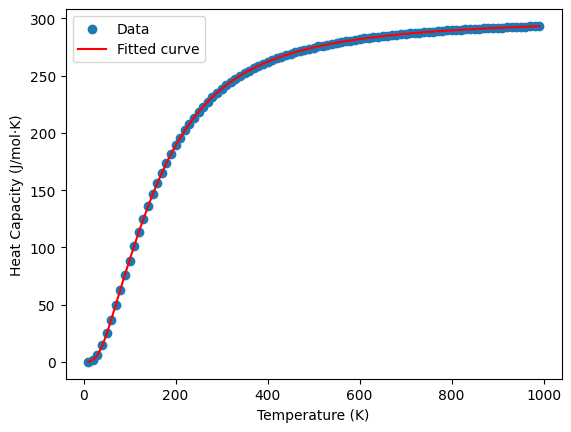

Optimal parameters: [3.75623093e+02 6.76604845e+02 5.97666708e+00 5.58720367e-04]
Parameter uncertainties: [1.82597751e+00 2.04377406e+00 4.63201976e-02 5.32058263e-05]


In [12]:
import numpy as np
from matplotlib import pylab as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit

# Load Cp vs T data
kk = np.genfromtxt('CpvsT.dat')
xx = kk[:, 0]
yy = kk[:, 1]

# Debye + Einstein + Electronic (gamma*T) model
def model_func(x, th_d, th_e, r, gamma):

    def integrand(z):
        s1 = (z**4) * np.exp(z)
        s2 = (np.exp(z) - 1)**2
        return s1 / s2

    cdlist = []
    for T in x:
        result, error = quad(integrand, 0, th_d / T)
        nn = 9 * 8.3145 * ((T / th_d)**3) * result
        cdlist.append(nn)

    # Einstein contribution
    ss1 = np.exp(th_e / x)
    ss2 = (np.exp(th_e / x) - 1)**2
    ss = ss1 / ss2
    ce = 3 * 8.3145 * ((th_e / x)**2) * ss

    cd = np.array(cdlist)
    # Debye + Einstein
    f = (12 - r) * cd + r * ce
    # Add electronic contribution
    f = f + gamma * x
    return f

# Data for fitting
x_data = xx[1:len(xx)]
y_data = yy[1:len(xx)]

# Parameter bounds: th_d, th_e, r, gamma
param_bounds = ([0, 0, 0, 0], [2000, 2000, 12, 10])  # adjust gamma upper bound as needed

# Perform the curve fit with bounds
popt, pcov = curve_fit(model_func, x_data, y_data, bounds=param_bounds)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, model_func(x_data, *popt), label='Fitted curve', color='red')
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Heat Capacity (J/mol·K)")
plt.show()

# Extract standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print("Optimal parameters:", popt)
print("Parameter uncertainties:", perr)